# **CUSTOMER REVENUE PREDICTION using DENSE NEURAL NETWORKS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

shop = pd.read_csv('drive/MyDrive/Content/online_shoppers_intention.csv')
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
shop.shape

(12330, 18)

In [ ]:
shop.isnull().sum()

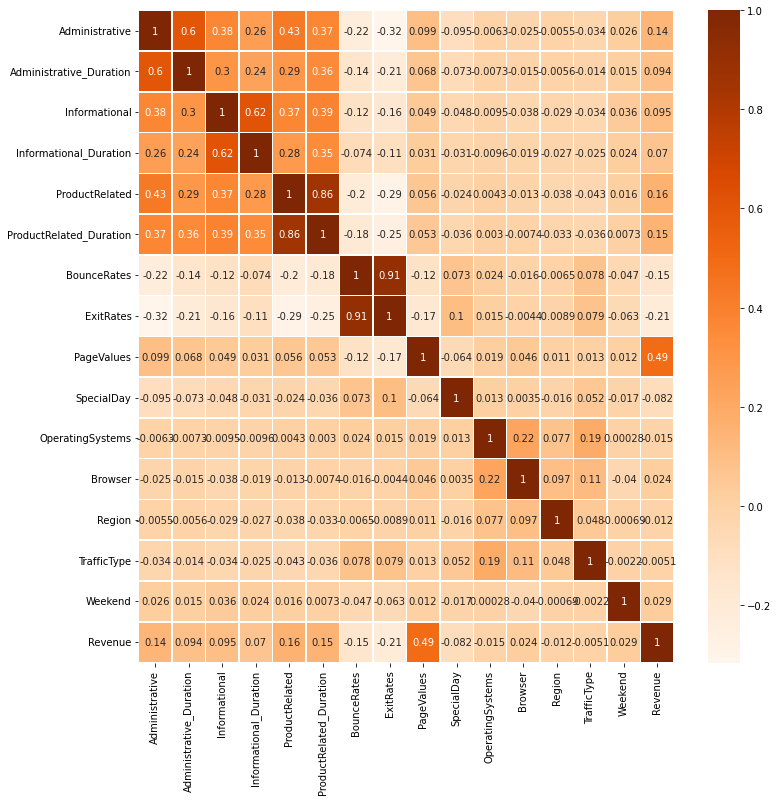

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(shop.corr(),annot=True,cmap='Oranges',linewidths=.5)

In [ ]:
shope = shop.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis = 1)
shope.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
shope['ProductRelated'].value_counts()

In [ ]:
shope['Month'].value_counts()

In [ ]:
shope['OperatingSystems'].value_counts()

In [ ]:
shope['VisitorType'].value_counts()

In [ ]:
shope['Browser'].value_counts()

In [ ]:
shope['Region'].value_counts()

In [ ]:
visitor = pd.get_dummies(shope['VisitorType'])

X = pd.concat([shope, visitor], axis=1)
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0,1
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0,1
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0,1
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0,1
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0,1


In [ ]:
X.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [ ]:
y = X['Revenue']
X_new = X.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)

X_new['Weekend'] = np.asarray(X_new['Weekend']).astype(np.float32)

y = np.asarray(y).astype(np.float32)

y.shape

(12330,)

In [ ]:
X_new.shape

(12330, 15)

In [ ]:
# Build the model

model = Sequential()
model.add(Dense(units=18,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))

# Last layer for multi-class classification of 2 classes
model.add(Dense(units=2,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_new,y,epochs=100, validation_split=0.1)

Epoch 1/100
347/347 [==============================] - 2s 3ms/step - loss: 0.6117 - accuracy: 0.8619 - val_loss: 0.5467 - val_accuracy: 0.8337
Epoch 2/100
347/347 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8902 - val_loss: 0.5134 - val_accuracy: 0.8216
Epoch 3/100
347/347 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.8892 - val_loss: 0.5074 - val_accuracy: 0.8378
Epoch 4/100
347/347 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.8885 - val_loss: 0.4330 - val_accuracy: 0.8167
Epoch 5/100
347/347 [==============================] - 1s 3ms/step - loss: 0.3035 - accuracy: 0.8906 - val_loss: 0.4346 - val_accuracy: 0.8313
Epoch 6/100
347/347 [==============================] - 1s 3ms/step - loss: 0.2960 - accuracy: 0.8919 - val_loss: 0.4291 - val_accuracy: 0.8402
Epoch 7/100
347/347 [==============================] - 1s 4ms/step - loss: 0.2822 - accuracy: 0.8894 - val_loss: 0.4297 - val_accuracy: 0.8410